In [5]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, recall_score
import matplotlib.pyplot as plt
import dill
import sys
import seaborn as sns
# import the pipeline file
sys.path.insert(0,'../')
from utils import split_data

/Users/nikulnayi/Documents/AIP/Telewire/TBC-AIP-2023-A7_Telewire-Analytics/notebooks/utils/split_data.py


In [6]:
X_train,y_train = split_data.get_train_data()
X_test,y_test = split_data.get_test_data()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25832 entries, 0 to 25831
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         25832 non-null  object 
 1   CellName     25832 non-null  object 
 2   PRBUsageUL   25832 non-null  float64
 3   PRBUsageDL   25832 non-null  float64
 4   meanThr_DL   25832 non-null  float64
 5   meanThr_UL   25832 non-null  float64
 6   maxThr_DL    25832 non-null  float64
 7   maxThr_UL    25832 non-null  float64
 8   meanUE_DL    25832 non-null  float64
 9   meanUE_UL    25832 non-null  float64
 10  maxUE_DL     25773 non-null  float64
 11  maxUE_UL     25773 non-null  float64
 12  maxUE_UL+DL  25828 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.6+ MB


In [7]:
with open('../pipelines/PreprocessingPipeline2.0.pkl', 'rb') as f:
    pipeline,categories = dill.load(f)
print(pipeline)

Pipeline(steps=[('SetNull', NullEncoder()),
                ('TimeConversion', TimeConversation()),
                ('ObjectToFloat', ObjectToFloat()), ('Scaling', Scaling()),
                ('OneHotEncoding',
                 OneHotEncoding(categories=array(['10ALTE', '10BLTE', '10CLTE', '1ALTE', '1BLTE', '1CLTE', '2ALTE',
       '3ALTE', '3BLTE', '3CLTE', '4ALTE', '4BLTE', '4CLTE', '5ALTE',
       '5BLTE', '5CLTE', '6ALTE', '6BLTE', '6CLTE', '6ULTE', '6VLTE',
       '6WLTE', '7ALTE', '7BLTE', '7CLTE', '7ULTE', '7VLTE', '7WLTE',
       '8ALTE', '8BLTE', '8CLTE', '9ALTE', '9BLTE'], dtype=object)))])


0.8035363457760314


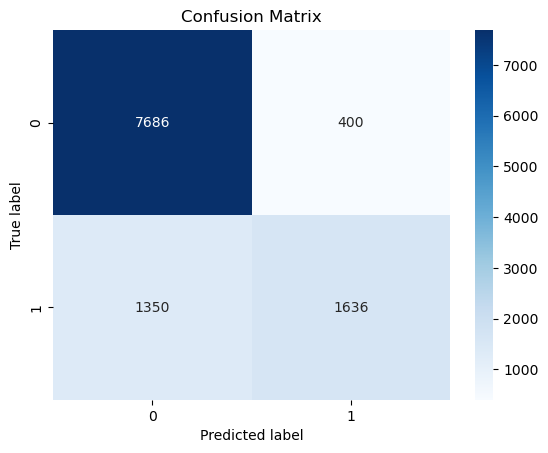

In [9]:
ProcessedXTrain  = pipeline.transform(X_train)
# Define the model pipeline
xgboost = Pipeline([
    ('xgboost', XGBClassifier()),
])
xgboost.fit(ProcessedXTrain, y_train)
# model.fit(pipeline.fit_transform(X_train), y_train)
ModelPipeline  = Pipeline([
    ('preprocessing', pipeline),
    ('model',xgboost)
])
ModelPipeline.fit(X_train, y_train)
predict = ModelPipeline.predict(X_test)
print(recall_score(predict,y_test))
cm = confusion_matrix(y_test, predict)
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
with open('../../models/ModelXGboost.pkl', 'wb') as f:
    dill.dump(xgboost, f)